In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams.update({'font.size': 18, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':6})
mpl.rcParams.update({'xtick.minor.size':4})
mpl.rcParams.update({'ytick.major.size':6})
mpl.rcParams.update({'ytick.minor.size':4})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})
mpl.rcParams.update({'legend.frameon':False,'legend.framealpha':0.0})
# mpl.rcParams.update({'axes.grid':True})

## Modelo SSH

\begin{eqnarray}
H(k) = \left[
\begin{array}{cc}
0& v+we^{-ik}\\
v+we^{ik}&0
\end{array}
\right]
\end{eqnarray}

In [3]:
def HamSSH(k,v=0.5,w=1.0):
    H = np.array([[0,v+w*exp(-1J*k)],
                  [v+w*exp(1J*k),0]])
    return H

## Estructura de Bandas

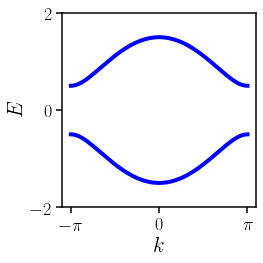

In [60]:
v = 1.0; w = 0.5
kpath = linspace(-pi,pi,1000)
E = []
for k in kpath:
    H     = HamSSH(k,v,w)
    Ek,vk = eigh(H)
    E.append(Ek)
E = array(E)

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
ax.plot(kpath,E.T[0],c='b',lw=4)
ax.plot(kpath,E.T[1],c='b',lw=4)
ax.set_xlabel(r'$k$');
ax.set_ylabel(r'$E$');
ax.set_xticks([-pi,0,pi]);
ax.set_xticklabels([r'$-\pi$',r'$0$',r'$\pi$']);
ax.set_yticks([-2,0,2]);
fig.tight_layout()
fig.savefig("Bandas1.png")

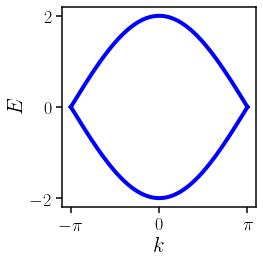

In [61]:
v = 1.0; w = 1.0
kpath = linspace(-pi,pi,1000)
E = []
for k in kpath:
    H     = HamSSH(k,v,w)
    Ek,vk = eigh(H)
    E.append(Ek)
E = array(E)

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
ax.plot(kpath,E.T[0],c='b',lw=4)
ax.plot(kpath,E.T[1],c='b',lw=4)
ax.set_xlabel(r'$k$');
ax.set_ylabel(r'$E$');
ax.set_xticks([-pi,0,pi]);
ax.set_xticklabels([r'$-\pi$',r'$0$',r'$\pi$']);
ax.set_yticks([-2,0,2]);
fig.tight_layout()
fig.savefig("Bandas2.png")

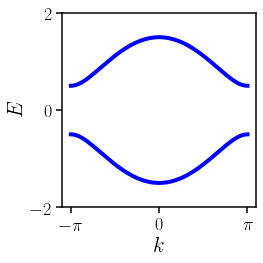

In [62]:
v = 0.5; w = 1.0
kpath = linspace(-pi,pi,1000)
E = []
for k in kpath:
    H     = HamSSH(k,v,w)
    Ek,vk = eigh(H)
    E.append(Ek)
E = array(E)

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
ax.plot(kpath,E.T[0],c='b',lw=4)
ax.plot(kpath,E.T[1],c='b',lw=4)
ax.set_xlabel(r'$k$');
ax.set_ylabel(r'$E$');
ax.set_xticks([-pi,0,pi]);
ax.set_xticklabels([r'$-\pi$',r'$0$',r'$\pi$']);
ax.set_yticks([-2,0,2]);
fig.tight_layout()
fig.savefig("Bandas3.png")

In [4]:
def GetPhase(v,w):
    kpath = linspace(-pi,pi,1000)

    Ek,vk = eigh(HamSSH(kpath[0],v,w))
    u0    = vk.T[Ek<0]
    Ek,vk = eigh(HamSSH(kpath[1],v,w))
    u1    = vk.T[Ek<0]
    Prod  = np.vdot(u0,u1)

    un1   = u1
    for k in kpath[2:]:
        H     = HamSSH(k,v,w)
        Ek,vk = eigh(H)
        un    = vk.T[Ek<0]
        Prod *= np.vdot(un1,un)
        # Update
        un1   = un
    ϕ = imag( log(Prod) )
    
    return ϕ

In [5]:
w = 1.0
vpath = linspace(0,3.0,80)
ϕv    = []
for v in vpath:
    ϕ = GetPhase(v,w)
    ϕv.append( abs(ϕ) )


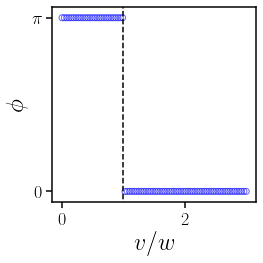

In [9]:
fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(4.0,4.0))
axes.scatter(vpath,ϕv,alpha=0.6,facecolors='none',edgecolors='b')
axes.set_xlabel(r"$v/w$",size=24)
axes.set_ylabel(r'$\phi$',size=24)
axes.set_yticks([0,pi])
axes.plot([1,1],[-1,1.1*pi],'--',c='k')
# axes.plot([-1,-1],[-1,1.1*pi],'--',c='k')
axes.set_yticks([0,pi])
axes.set_ylim(-0.2,pi+0.2)
axes.set_yticklabels([r'$0$',r'$\pi$'])
fig.tight_layout()
fig.savefig('zak.png')